# Applying Temporal Convolutional Network (TCN) to time series forecasting of Well and Riser flow rates

## Author: Ridha Alkhabaz

This is notebook to explore Prophet algorithm viability to predict volume flow rates in a well. Specifically, we are investigating water volume flow rate in this notebook. 


## Imports:

In [1]:
import os
os.chdir('/Users/ridhaalkhabaz/Documents/GitHub/VFM_ML/src')
from preprocessing import read_data_well, multivariate_data, univariate_data, dataframe
from configuration import configure 
os.chdir("/Users/ridhaalkhabaz/Documents/GitHub/VFM_ML")
from main import model_init, model_train, model_predict
# for tcn applications
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, RepeatVector
from tensorflow.keras.preprocessing import sequence
from tcn import TCN
import tensorflow as tf
# for data configurations
import sys
import json
import random
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import adjusted_rand_score
import datetime as dttm

Importing plotly failed. Interactive plots will not work.


#### Reading the data and visualization:
We use the previous operation period to predict the fifth one. We did some padding between the operation period to make sure that TCN observes the gradual trend to steady-state. 

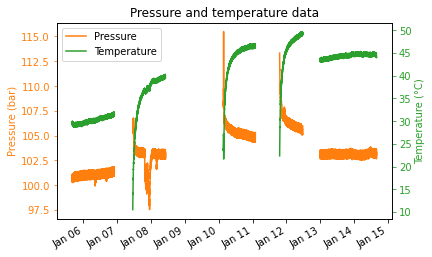

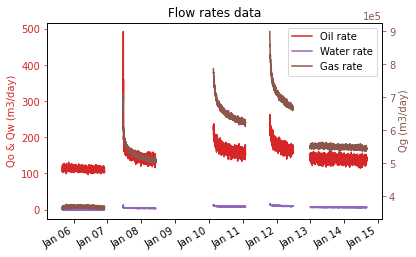

In [2]:
fp, headers, _ = read_data_well('welltest.csv', plot_data=True)
df_pd = dataframe(fp, ['ds', 'pressure', 'temperature', 'oil', 'water', 'gas'], True, True)
df = dataframe(fp, ['ds', 'pressure', 'temperature', 'oil', 'water', 'gas'], False, True)
df = df.drop(['ds'], axis=1)
df_pd = df_pd.drop(['ds'], axis=1)
### Univariate model 
train_uni_water = np.array(df['water'])
train_uni_water_pd = np.array(df_pd['water'])
## multivariate 
train_mult_water = pd.concat([df.iloc[:, 0:2], df['water']], axis=1)
train_mult_water_pd = pd.concat([df_pd.iloc[:, 0:2], df_pd['water']], axis=1)
train_mult_water_t = pd.concat([df.iloc[:, 0:2],df['time'], df['water'], df['water']], axis=1)
train_mult_water_t_pd = pd.concat([df_pd.iloc[:, 0:2],df_pd['time'], df_pd['water'], df_pd['water']], axis=1)
train_mult_water_prv = pd.concat([df.iloc[:, 0:2],df['water'], df['water']], axis=1)
train_mult_water_prv_pd = pd.concat([df_pd.iloc[:, 0:2],df_pd['water'], df_pd['water']], axis=1)
## hyperparameters for out models
basic = {'input_shape':(300,1), 'dropout_rate':0.2}
basic_mult = {'input_shape':(300,2), 'dropout_rate':0.2}
basic_mult_pst = {'input_shape':(300,3), 'dropout_rate':0.2}
basic_mult_psT = {'input_shape':(300,4), 'dropout_rate':0.2}
tuned = {'input_shape':(300,1), 'nb_filters':32, 'kernel_size':3, 'dilations':(1, 2, 4, 8),'dropout_rate':0.2}
tuned_mult = {'input_shape':(300,2), 'nb_filters':32, 'kernel_size':3, 'dilations':(1, 2, 4, 8),'dropout_rate':0.2}
tuned_mult_pst = {'input_shape':(300,3), 'nb_filters':32, 'kernel_size':3, 'dilations':(1, 2, 4, 8),'dropout_rate':0.2}
tuned_mult_pstT = {'input_shape':(300,4), 'nb_filters':32, 'kernel_size':3, 'dilations':(1, 2, 4, 8),'dropout_rate':0.2}

#### Initialization:
We are trying to find the difference between univariate, multivairate, tuned and basic implementation of TCN. 

In [7]:
tcn_water_basic_uni_whole= model_init(model='TCN', hyperparameters=basic) 
tcn_water_basic_uni_daily= model_init(model='TCN', hyperparameters=basic)
tcn_water_basic_uni_daily_pd= model_init(model='TCN', hyperparameters=basic) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_1 (TCN)                  (None, 64)                136256    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 136,581
Trainable params: 136,581
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_2 (TCN)                  (None, 64)                136256    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 325       
Total params: 136,581
Trainable params: 136,581
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3

In [9]:
tcn_water_uni_tuned_whole = model_init(model='TCN', hyperparameters=tuned) 
tcn_water_uni_tuned_daily = model_init(model='TCN', hyperparameters=tuned) 
tcn_water_uni_tuned_daily_pd = model_init(model='TCN', hyperparameters=tuned) 

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_7 (TCN)                  (None, 32)                21920     
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 165       
Total params: 22,085
Trainable params: 22,085
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_8 (TCN)                  (None, 32)                21920     
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 165       
Total params: 22,085
Trainable params: 22,085
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_9"
__

In [10]:
tcn_water_mult_basic_whole = model_init(model='TCN', hyperparameters=basic_mult) 
tcn_water_mult_basic_daily = model_init(model='TCN', hyperparameters=basic_mult) 
tcn_water_mult_basic_daily_pd = model_init(model='TCN', hyperparameters=basic_mult) 

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_10 (TCN)                 (None, 64)                136512    
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 325       
Total params: 136,837
Trainable params: 136,837
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_11 (TCN)                 (None, 64)                136512    
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 325       
Total params: 136,837
Trainable params: 136,837
Non-trainable params: 0
_________________________________________________________________
Model: "sequential

In [11]:
tcn_water_mult_basic_whole_pst = model_init(model='TCN',hyperparameters=basic_mult_pst ) 
tcn_water_mult_basic_daily_pst= model_init(model='TCN', hyperparameters=basic_mult_pst) 
tcn_water_mult_basic_daily_pd_pst = model_init(model='TCN', hyperparameters=basic_mult_pst) 

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_13 (TCN)                 (None, 64)                136768    
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 325       
Total params: 137,093
Trainable params: 137,093
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_14 (TCN)                 (None, 64)                136768    
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 325       
Total params: 137,093
Trainable params: 137,093
Non-trainable params: 0
_________________________________________________________________
Model: "sequential

In [13]:
tcn_water_mult_basic_whole_pstT = model_init(model='TCN',hyperparameters=basic_mult_psT) 
tcn_water_mult_basic_daily_pstT= model_init(model='TCN', hyperparameters=basic_mult_psT) 
tcn_water_mult_basic_daily_pd_pstT = model_init(model='TCN', hyperparameters=basic_mult_psT) 

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_16 (TCN)                 (None, 64)                137024    
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 325       
Total params: 137,349
Trainable params: 137,349
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_17 (TCN)                 (None, 64)                137024    
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 325       
Total params: 137,349
Trainable params: 137,349
Non-trainable params: 0
_________________________________________________________________
Model: "sequential

In [14]:
tcn_water_mult_tuned_whole = model_init(model='TCN', hyperparameters=tuned_mult) 
tcn_water_mult_tuned_daily = model_init(model='TCN', hyperparameters=tuned_mult) 
tcn_water_mult_tuned_daily_pd = model_init(model='TCN', hyperparameters=tuned_mult) 

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_19 (TCN)                 (None, 32)                22048     
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 165       
Total params: 22,213
Trainable params: 22,213
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_20 (TCN)                 (None, 32)                22048     
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 165       
Total params: 22,213
Trainable params: 22,213
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_21"

In [16]:
tcn_water_mult_tuned_whole_pst = model_init(model='TCN', hyperparameters=tuned_mult_pst) 
tcn_water_mult_tuned_daily_pst = model_init(model='TCN', hyperparameters=tuned_mult_pst) 
tcn_water_mult_tuned_daily_pd_pst = model_init(model='TCN',hyperparameters=tuned_mult_pst) 

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_22 (TCN)                 (None, 32)                22176     
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 165       
Total params: 22,341
Trainable params: 22,341
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_23 (TCN)                 (None, 32)                22176     
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 165       
Total params: 22,341
Trainable params: 22,341
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_24"

In [17]:
tcn_water_mult_tuned_whole_pstT = model_init(model='TCN', hyperparameters=tuned_mult_pstT) 
tcn_water_mult_tuned_daily_pstT = model_init(model='TCN', hyperparameters=tuned_mult_pstT) 
tcn_water_mult_tuned_daily_pd_pstT = model_init(model='TCN', hyperparameters=tuned_mult_pstT) 

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_25 (TCN)                 (None, 32)                22304     
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 165       
Total params: 22,469
Trainable params: 22,469
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_26 (TCN)                 (None, 32)                22304     
_________________________________________________________________
dense_26 (Dense)             (None, 5)                 165       
Total params: 22,469
Trainable params: 22,469
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_27"

#### Training:
We train our model on the training data. We train per operational period and in whole, with and without padding. 
##### Whole - No padding:

In [19]:
## Univaraiate training 
x_uni_train, y_uni_train = univariate_data(train_uni_water, 0, 5535, 300, 5)
x_uni_test, y_uni_test = univariate_data(train_uni_water, 5535, len(df)-10, 300, 5)
x_uni_train = x_uni_train.astype(np.float32)
y_uni_train = y_uni_train.astype(np.float32)
x_uni_test = x_uni_test.astype(np.float32)
y_uni_test = y_uni_test.astype(np.float32)
## Univaraiate training Padding 
x_uni_test_pd, y_uni_test_pd = univariate_data(train_uni_water_pd, 10560, len(df_pd)-10, 300, 5)
x_uni_test_pd = x_uni_test_pd.astype(np.float32)
y_uni_test_pd = y_uni_test_pd.astype(np.float32)
## multivariate training -pressure and temperature readings only 
x_mult_train, y_mult_train = multivariate_data(np.array(train_mult_water), 0,5535, 300, 5, column_index=2)
x_mult_test, y_mult_test = multivariate_data(np.array(train_mult_water), 5535, len(df)-10, 300, 5, column_index=2)
x_mult_train = x_mult_train.astype(np.float32)
y_mult_train = y_mult_train.astype(np.float32)
x_mult_test = x_mult_test.astype(np.float32)
y_mult_test = y_mult_test.astype(np.float32)
## multivariate training -using also previous readings as well
x_mult_train_pst, y_mult_train_pst = multivariate_data(np.array(train_mult_water_prv), 0,5535, 300, 5, column_index=3)
x_mult_test_pst, y_mult_test_pst = multivariate_data(np.array(train_mult_water_prv), 5535, len(df)-10, 300, 5, column_index=3)
x_mult_train_pst = x_mult_train_pst.astype(np.float32)
y_mult_train_pst = y_mult_train_pst.astype(np.float32)
x_mult_test_pst = x_mult_test_pst.astype(np.float32)
y_mult_test_pst = y_mult_test_pst.astype(np.float32)
## multivariate training -using also previous increasing time as well
x_mult_train_pstT, y_mult_train_pstT = multivariate_data(np.array(train_mult_water_t), 0,5535, 300, 5, column_index=4)
x_mult_test_pstT, y_mult_test_pstT = multivariate_data(np.array(train_mult_water_t), 5535, len(df)-10, 300, 5, column_index=4)
x_mult_train_pstT = x_mult_train_pstT.astype(np.float32)
y_mult_train_pstT = y_mult_train_pstT.astype(np.float32)
x_mult_test_pstT = x_mult_test_pstT.astype(np.float32)
y_mult_test_pstT = y_mult_test_pstT.astype(np.float32)
## multivariate training -pressure and temperature readings only 
x_mult_test_pd, y_mult_test_pd = multivariate_data(np.array(train_mult_water_pd), 10560, len(df_pd)-10, 300, 5, column_index=2)
x_mult_test_pd = x_mult_test_pd.astype(np.float32)
y_mult_test_pd = y_mult_test_pd.astype(np.float32)
## multivariate training -using also previous readings as well
x_mult_test_pst_pd, y_mult_test_pst_pd = multivariate_data(np.array(train_mult_water_prv_pd), 10560, len(df_pd)-10, 300, 5, column_index=3)
x_mult_test_pst_pd = x_mult_test_pst_pd.astype(np.float32)
y_mult_test_pst_pd = y_mult_test_pst_pd.astype(np.float32)
## multivariate training -using also previous increasing time as well
x_mult_test_pstT_pd, y_mult_test_pstT_pd = multivariate_data(np.array(train_mult_water_t_pd), 10590, len(df_pd)-1000, 300, 5, column_index=4)
x_mult_test_pstT_pd = x_mult_test_pstT_pd.astype(np.float32)
y_mult_test_pstT_pd = y_mult_test_pstT_pd.astype(np.float32)

In [20]:
history_tcn_water_basic_uni_whole = tcn_water_basic_uni_whole.fit(x_uni_train, y_uni_train, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 8s 183ms/step - loss: 43.0956 - val_loss: 0.2187
Epoch 2/50
32/32 [==============================] - 5s 170ms/step - loss: 0.5945 - val_loss: 0.0849
Epoch 3/50
32/32 [==============================] - 5s 168ms/step - loss: 0.3557 - val_loss: 0.0473
Epoch 4/50
32/32 [==============================] - 6s 175ms/step - loss: 0.2349 - val_loss: 0.0741
Epoch 5/50
32/32 [==============================] - 6s 175ms/step - loss: 0.1889 - val_loss: 0.0512
Epoch 6/50
32/32 [==============================] - 6s 177ms/step - loss: 0.1450 - val_loss: 0.0657
Epoch 7/50
32/32 [==============================] - 5s 170ms/step - loss: 0.1176 - val_loss: 0.0572
Epoch 8/50
32/32 [==============================] - 6s 174ms/step - loss: 0.0903 - val_loss: 0.0595
Epoch 9/50
32/32 [==============================] - 6s 178ms/step - loss: 0.0916 - val_loss: 0.0499
Epoch 10/50
32/32 [==============================] - 5s 169ms/step - loss: 0.0719 - val_loss: 0.058

In [21]:
history_tcn_water_uni_tuned_whole= tcn_water_uni_tuned_whole.fit(x_uni_train, y_uni_train, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 4s 69ms/step - loss: 3.7427 - val_loss: 0.0231
Epoch 2/50
32/32 [==============================] - 2s 60ms/step - loss: 0.2273 - val_loss: 0.0261
Epoch 3/50
32/32 [==============================] - 2s 72ms/step - loss: 0.1400 - val_loss: 0.0261
Epoch 4/50
32/32 [==============================] - 2s 65ms/step - loss: 0.1053 - val_loss: 0.0219
Epoch 5/50
32/32 [==============================] - 2s 60ms/step - loss: 0.0740 - val_loss: 0.0268
Epoch 6/50
32/32 [==============================] - 2s 69ms/step - loss: 0.0622 - val_loss: 0.0290
Epoch 7/50
32/32 [==============================] - 2s 64ms/step - loss: 0.0497 - val_loss: 0.0299
Epoch 8/50
32/32 [==============================] - 2s 70ms/step - loss: 0.0400 - val_loss: 0.0217
Epoch 9/50
32/32 [==============================] - 2s 69ms/step - loss: 0.0330 - val_loss: 0.0209
Epoch 10/50
32/32 [==============================] - 2s 74ms/step - loss: 0.0293 - val_loss: 0.0137
Epoch 11/

In [22]:
history_tcn_water_mult_basic_whole = tcn_water_mult_basic_whole.fit(x_mult_train, y_mult_train, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 8s 177ms/step - loss: 85.0905 - val_loss: 0.0945
Epoch 2/50
32/32 [==============================] - 5s 170ms/step - loss: 1.2067 - val_loss: 0.0813
Epoch 3/50
32/32 [==============================] - 6s 180ms/step - loss: 0.7587 - val_loss: 0.1409
Epoch 4/50
32/32 [==============================] - 5s 164ms/step - loss: 0.5555 - val_loss: 0.1263
Epoch 5/50
32/32 [==============================] - 5s 166ms/step - loss: 0.4426 - val_loss: 0.1329
Epoch 6/50
32/32 [==============================] - 5s 168ms/step - loss: 0.3621 - val_loss: 0.1091
Epoch 7/50
32/32 [==============================] - 5s 164ms/step - loss: 0.3269 - val_loss: 0.0987
Epoch 8/50
32/32 [==============================] - 5s 167ms/step - loss: 0.2717 - val_loss: 0.0639
Epoch 9/50
32/32 [==============================] - 6s 172ms/step - loss: 0.2500 - val_loss: 0.0419
Epoch 10/50
32/32 [==============================] - 5s 171ms/step - loss: 0.2125 - val_loss: 0.033

In [23]:
history_tcn_water_mult_tuned_whole = tcn_water_mult_tuned_whole.fit(x_mult_train, y_mult_train, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 4s 74ms/step - loss: 28.7002 - val_loss: 0.2529
Epoch 2/50
32/32 [==============================] - 2s 58ms/step - loss: 0.8258 - val_loss: 0.1221
Epoch 3/50
32/32 [==============================] - 2s 55ms/step - loss: 0.4483 - val_loss: 0.1123
Epoch 4/50
32/32 [==============================] - 2s 54ms/step - loss: 0.3452 - val_loss: 0.0962
Epoch 5/50
32/32 [==============================] - 2s 55ms/step - loss: 0.2774 - val_loss: 0.0730
Epoch 6/50
32/32 [==============================] - 2s 55ms/step - loss: 0.2573 - val_loss: 0.0831
Epoch 7/50
32/32 [==============================] - 2s 54ms/step - loss: 0.2165 - val_loss: 0.0746
Epoch 8/50
32/32 [==============================] - 2s 60ms/step - loss: 0.1886 - val_loss: 0.0669
Epoch 9/50
32/32 [==============================] - 2s 58ms/step - loss: 0.1678 - val_loss: 0.0687
Epoch 10/50
32/32 [==============================] - 2s 55ms/step - loss: 0.1450 - val_loss: 0.0737
Epoch 11

In [24]:
history_tcn_water_mult_basic_whole_pst = tcn_water_mult_basic_whole_pst.fit(x_mult_train_pst, y_mult_train_pst, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 10s 235ms/step - loss: 187.6620 - val_loss: 1.1210
Epoch 2/50
32/32 [==============================] - 7s 203ms/step - loss: 1.6539 - val_loss: 0.5338
Epoch 3/50
32/32 [==============================] - 6s 199ms/step - loss: 0.9809 - val_loss: 0.3707
Epoch 4/50
32/32 [==============================] - 5s 170ms/step - loss: 0.7337 - val_loss: 0.3000
Epoch 5/50
32/32 [==============================] - 6s 174ms/step - loss: 0.5941 - val_loss: 0.2707
Epoch 6/50
32/32 [==============================] - 7s 211ms/step - loss: 0.4817 - val_loss: 0.2728
Epoch 7/50
32/32 [==============================] - 6s 190ms/step - loss: 0.4015 - val_loss: 0.2834
Epoch 8/50
32/32 [==============================] - 5s 171ms/step - loss: 0.3329 - val_loss: 0.1741
Epoch 9/50
32/32 [==============================] - 5s 170ms/step - loss: 0.3048 - val_loss: 0.1834
Epoch 10/50
32/32 [==============================] - 6s 174ms/step - loss: 0.2449 - val_loss: 0.1

In [25]:
history_tcn_water_mult_tuned_whole_pst = tcn_water_mult_tuned_whole_pst.fit(x_mult_train_pst, y_mult_train_pst, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 3s 62ms/step - loss: 4.8062 - val_loss: 0.0665
Epoch 2/50
32/32 [==============================] - 2s 54ms/step - loss: 0.2921 - val_loss: 0.0226
Epoch 3/50
32/32 [==============================] - 2s 53ms/step - loss: 0.1520 - val_loss: 0.0228
Epoch 4/50
32/32 [==============================] - 2s 53ms/step - loss: 0.1094 - val_loss: 0.0531
Epoch 5/50
32/32 [==============================] - 2s 53ms/step - loss: 0.0822 - val_loss: 0.0342
Epoch 6/50
32/32 [==============================] - 2s 55ms/step - loss: 0.0646 - val_loss: 0.0506
Epoch 7/50
32/32 [==============================] - 2s 54ms/step - loss: 0.0611 - val_loss: 0.0468
Epoch 8/50
32/32 [==============================] - 2s 53ms/step - loss: 0.0484 - val_loss: 0.0474
Epoch 9/50
32/32 [==============================] - 2s 54ms/step - loss: 0.0413 - val_loss: 0.0470
Epoch 10/50
32/32 [==============================] - 2s 53ms/step - loss: 0.0390 - val_loss: 0.0317
Epoch 11/

In [26]:
history_tcn_water_mult_basic_whole_pstT = tcn_water_mult_basic_whole_pstT.fit(x_mult_train_pstT, y_mult_train_pstT, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 9s 193ms/step - loss: 664152028.6061 - val_loss: 4018485.2500
Epoch 2/50
32/32 [==============================] - 6s 173ms/step - loss: 7309022.0909 - val_loss: 2097128.7500
Epoch 3/50
32/32 [==============================] - 6s 173ms/step - loss: 4460502.5379 - val_loss: 1265153.5000
Epoch 4/50
32/32 [==============================] - 6s 173ms/step - loss: 3095132.3523 - val_loss: 1128273.6250
Epoch 5/50
32/32 [==============================] - 6s 173ms/step - loss: 2220123.2955 - val_loss: 1166055.1250
Epoch 6/50
32/32 [==============================] - 6s 199ms/step - loss: 1747304.4394 - val_loss: 737919.6250
Epoch 7/50
32/32 [==============================] - 6s 199ms/step - loss: 1777538.6591 - val_loss: 823561.6875
Epoch 8/50
32/32 [==============================] - 7s 225ms/step - loss: 1316466.0909 - val_loss: 581841.7500
Epoch 9/50
32/32 [==============================] - 7s 221ms/step - loss: 1017958.8371 - val_loss: 430629

In [27]:
history_tcn_water_mult_tuned_whole_pstT = tcn_water_mult_tuned_whole_pstT.fit(x_mult_train_pstT, y_mult_train_pstT, epochs=50, validation_split=0.05)

Epoch 1/50
32/32 [==============================] - 4s 65ms/step - loss: 89964691.0303 - val_loss: 2621240.7500
Epoch 2/50
32/32 [==============================] - 2s 53ms/step - loss: 4759812.5152 - val_loss: 1120806.0000
Epoch 3/50
32/32 [==============================] - 2s 54ms/step - loss: 2756397.1818 - val_loss: 994202.4375
Epoch 4/50
32/32 [==============================] - 2s 54ms/step - loss: 1722272.9394 - val_loss: 514393.5938
Epoch 5/50
32/32 [==============================] - 2s 55ms/step - loss: 1303794.5417 - val_loss: 538678.2500
Epoch 6/50
32/32 [==============================] - 2s 54ms/step - loss: 1077818.0777 - val_loss: 275637.0938
Epoch 7/50
32/32 [==============================] - 2s 53ms/step - loss: 848564.0019 - val_loss: 107105.1484
Epoch 8/50
32/32 [==============================] - 2s 63ms/step - loss: 610542.5057 - val_loss: 87858.9375
Epoch 9/50
32/32 [==============================] - 2s 56ms/step - loss: 584943.1951 - val_loss: 156227.3750
Epoch 10/50

##### Daily - no padding

In [28]:
sumin = 0
lengths = [0]
for i in fp:
    sumin += len(i)
    lengths.append(sumin)
splits = [0, 2579, 6432, 8832, 10560]
lengths

[0, 1797, 3191, 4557, 5535, 7933]

In [29]:
for i in range(4):
    ### configuration for univariate models' training 
    x_uni_train, y_uni_train = univariate_data(train_uni_water, lengths[i], lengths[i+1], 300, 5)
    x_uni_train = x_uni_train.astype(np.float32)
    y_uni_train = y_uni_train.astype(np.float32)
    # training the univariate models.
    print("check one")
    history_tcn_water_basic_uni_daily = tcn_water_basic_uni_daily.fit(x_uni_train, y_uni_train, epochs=50, validation_split=0.05)
    print("check two")
    history_tcn_water_uni_tuned_daily = tcn_water_uni_tuned_daily.fit(x_uni_train, y_uni_train, epochs=50, validation_split=0.05)
    ## configuration for multivariate models 
    ## multivariate training -pressure and temperature readings only 
    x_mult_train, y_mult_train = multivariate_data(np.array(train_mult_water), lengths[i], lengths[i+1]-10, 300, 5, column_index=2)
    x_mult_train = x_mult_train.astype(np.float32)
    y_mult_train = y_mult_train.astype(np.float32)
    ## multivariate training -using also previous readings as well
    x_mult_train_pst, y_mult_train_pst = multivariate_data(np.array(train_mult_water_prv), lengths[i], lengths[i+1]-10, 300, 5, column_index=3)
    x_mult_train_pst = x_mult_train_pst.astype(np.float32)
    y_mult_train_pst = y_mult_train_pst.astype(np.float32)
    ## multivariate training -using also previous increasing time as well
    x_mult_train_pstT, y_mult_train_pstT = multivariate_data(np.array(train_mult_water_t), lengths[i], lengths[i+1]-10, 300, 5, column_index=4)
    x_mult_train_pstT = x_mult_train_pstT.astype(np.float32)
    y_mult_train_pstT = y_mult_train_pstT.astype(np.float32)
    # training the multivariate models 
    #### P and T
    print("check 3")
    history_tcn_water_mult_basic_daily = tcn_water_mult_basic_daily.fit(x_mult_train, y_mult_train, epochs=50, validation_split=0.05)
    print("check 4")
    history_tcn_water_mult_tuned_daily = tcn_water_mult_tuned_daily.fit(x_mult_train, y_mult_train, epochs=50, validation_split=0.05)
    #### P, T, and PST
    print("check 5")
    history_tcn_water_mult_basic_daily_pst = tcn_water_mult_basic_daily_pst.fit(x_mult_train_pst, y_mult_train_pst, epochs=50, validation_split=0.05)
    print("check 6")
    history_tcn_water_mult_tuned_daily_pst = tcn_water_mult_tuned_daily_pst.fit(x_mult_train_pst, y_mult_train_pst, epochs=50, validation_split=0.05)
    #### P, T, PST, and Time 
    print("check 7")
    history_tcn_water_mult_basic_daily_pstT = tcn_water_mult_basic_daily_pstT.fit(x_mult_train_pstT, y_mult_train_pstT, epochs=50, validation_split=0.05)
    print("check 8")
    history_tcn_water_mult_tuned_daily_pstT = tcn_water_mult_tuned_daily_pstT.fit(x_mult_train_pstT, y_mult_train_pstT, epochs=50, validation_split=0.05)
    print('++++++++++++++++++++++++++++++++++++++++')
    print(i)
    print('++++++++++++++++++++++++++++++++++++++++++')

check one
Epoch 1/50
9/9 [==============================] - 4s 233ms/step - loss: 1.5681 - val_loss: 0.0116
Epoch 2/50
9/9 [==============================] - 2s 178ms/step - loss: 0.0388 - val_loss: 0.0030
Epoch 3/50
9/9 [==============================] - 2s 182ms/step - loss: 0.0107 - val_loss: 0.0026
Epoch 4/50
9/9 [==============================] - 2s 181ms/step - loss: 0.0073 - val_loss: 0.0018
Epoch 5/50
9/9 [==============================] - 2s 180ms/step - loss: 0.0053 - val_loss: 0.0014
Epoch 6/50
9/9 [==============================] - 2s 254ms/step - loss: 0.0043 - val_loss: 0.0011
Epoch 7/50
9/9 [==============================] - 2s 182ms/step - loss: 0.0037 - val_loss: 0.0010
Epoch 8/50
9/9 [==============================] - 2s 183ms/step - loss: 0.0032 - val_loss: 9.7318e-04
Epoch 9/50
9/9 [==============================] - 2s 191ms/step - loss: 0.0029 - val_loss: 9.3891e-04
Epoch 10/50
9/9 [==============================] - 2s 201ms/step - loss: 0.0028 - val_loss: 9.0142e-

Epoch 30/50
9/9 [==============================] - 1s 58ms/step - loss: 3.8846e-04 - val_loss: 2.9327e-04
Epoch 31/50
9/9 [==============================] - 1s 58ms/step - loss: 3.8147e-04 - val_loss: 2.9484e-04
Epoch 32/50
9/9 [==============================] - 1s 58ms/step - loss: 3.8748e-04 - val_loss: 2.9723e-04
Epoch 33/50
9/9 [==============================] - 1s 61ms/step - loss: 3.6988e-04 - val_loss: 2.9074e-04
Epoch 34/50
9/9 [==============================] - 1s 59ms/step - loss: 3.6102e-04 - val_loss: 2.8948e-04
Epoch 35/50
9/9 [==============================] - 1s 57ms/step - loss: 3.8722e-04 - val_loss: 2.8786e-04
Epoch 36/50
9/9 [==============================] - 1s 57ms/step - loss: 3.6245e-04 - val_loss: 2.9011e-04
Epoch 37/50
9/9 [==============================] - 1s 57ms/step - loss: 3.7107e-04 - val_loss: 2.9368e-04
Epoch 38/50
9/9 [==============================] - 1s 56ms/step - loss: 3.7152e-04 - val_loss: 2.8786e-04
Epoch 39/50
9/9 [=============================

9/9 [==============================] - 1s 56ms/step - loss: 0.0649 - val_loss: 0.0041
Epoch 12/50
9/9 [==============================] - 1s 56ms/step - loss: 0.0576 - val_loss: 0.0039
Epoch 13/50
9/9 [==============================] - 1s 60ms/step - loss: 0.0558 - val_loss: 0.0038
Epoch 14/50
9/9 [==============================] - 1s 62ms/step - loss: 0.0486 - val_loss: 0.0036
Epoch 15/50
9/9 [==============================] - 1s 59ms/step - loss: 0.0504 - val_loss: 0.0052
Epoch 16/50
9/9 [==============================] - 1s 79ms/step - loss: 0.0405 - val_loss: 0.0075
Epoch 17/50
9/9 [==============================] - 1s 59ms/step - loss: 0.0431 - val_loss: 0.0057
Epoch 18/50
9/9 [==============================] - 1s 60ms/step - loss: 0.0363 - val_loss: 0.0044
Epoch 19/50
9/9 [==============================] - 1s 60ms/step - loss: 0.0337 - val_loss: 0.0050
Epoch 20/50
9/9 [==============================] - 1s 59ms/step - loss: 0.0309 - val_loss: 0.0048
Epoch 21/50
9/9 [===============

9/9 [==============================] - 2s 176ms/step - loss: 0.0674 - val_loss: 0.0107
Epoch 45/50
9/9 [==============================] - 2s 176ms/step - loss: 0.0694 - val_loss: 0.0097
Epoch 46/50
9/9 [==============================] - 2s 177ms/step - loss: 0.0622 - val_loss: 0.0096
Epoch 47/50
9/9 [==============================] - 2s 176ms/step - loss: 0.0621 - val_loss: 0.0093
Epoch 48/50
9/9 [==============================] - 2s 177ms/step - loss: 0.0667 - val_loss: 0.0101
Epoch 49/50
9/9 [==============================] - 2s 177ms/step - loss: 0.0636 - val_loss: 0.0094
Epoch 50/50
9/9 [==============================] - 2s 176ms/step - loss: 0.0539 - val_loss: 0.0084
check 6
Epoch 1/50
9/9 [==============================] - 2s 95ms/step - loss: 7.6335 - val_loss: 0.1549
Epoch 2/50
9/9 [==============================] - 1s 61ms/step - loss: 0.6138 - val_loss: 0.0979
Epoch 3/50
9/9 [==============================] - 1s 59ms/step - loss: 0.3190 - val_loss: 0.0577
Epoch 4/50
9/9 [====

9/9 [==============================] - 2s 177ms/step - loss: 151012.0562 - val_loss: 43836.6680
Epoch 26/50
9/9 [==============================] - 2s 176ms/step - loss: 152370.4266 - val_loss: 39854.7656
Epoch 27/50
9/9 [==============================] - 2s 182ms/step - loss: 150025.9078 - val_loss: 42366.1914
Epoch 28/50
9/9 [==============================] - 2s 182ms/step - loss: 150429.9234 - val_loss: 48687.0391
Epoch 29/50
9/9 [==============================] - 2s 179ms/step - loss: 139661.5984 - val_loss: 50155.0586
Epoch 30/50
9/9 [==============================] - 2s 178ms/step - loss: 131479.5836 - val_loss: 41869.9648
Epoch 31/50
9/9 [==============================] - 2s 175ms/step - loss: 111816.7961 - val_loss: 29954.9785
Epoch 32/50
9/9 [==============================] - 2s 177ms/step - loss: 113733.3273 - val_loss: 28406.7773
Epoch 33/50
9/9 [==============================] - 2s 177ms/step - loss: 111061.9023 - val_loss: 30335.7500
Epoch 34/50
9/9 [=======================

7/7 [==============================] - 1s 177ms/step - loss: 0.0590 - val_loss: 0.0090
Epoch 2/50
7/7 [==============================] - 1s 170ms/step - loss: 0.0385 - val_loss: 0.0096
Epoch 3/50
7/7 [==============================] - 1s 170ms/step - loss: 0.0236 - val_loss: 0.0054
Epoch 4/50
7/7 [==============================] - 1s 168ms/step - loss: 0.0173 - val_loss: 0.0057
Epoch 5/50
7/7 [==============================] - 1s 167ms/step - loss: 0.0132 - val_loss: 0.0077
Epoch 6/50
7/7 [==============================] - 1s 167ms/step - loss: 0.0116 - val_loss: 0.0030
Epoch 7/50
7/7 [==============================] - 1s 168ms/step - loss: 0.0090 - val_loss: 0.0034
Epoch 8/50
7/7 [==============================] - 1s 165ms/step - loss: 0.0077 - val_loss: 0.0043
Epoch 9/50
7/7 [==============================] - 1s 170ms/step - loss: 0.0072 - val_loss: 0.0036
Epoch 10/50
7/7 [==============================] - 1s 168ms/step - loss: 0.0064 - val_loss: 0.0028
Epoch 11/50
7/7 [=============

7/7 [==============================] - 0s 59ms/step - loss: 7.2710e-04 - val_loss: 5.6597e-04
Epoch 33/50
7/7 [==============================] - 0s 58ms/step - loss: 7.0151e-04 - val_loss: 5.5486e-04
Epoch 34/50
7/7 [==============================] - 0s 55ms/step - loss: 6.3703e-04 - val_loss: 5.9330e-04
Epoch 35/50
7/7 [==============================] - 0s 58ms/step - loss: 6.7433e-04 - val_loss: 5.6031e-04
Epoch 36/50
7/7 [==============================] - 0s 58ms/step - loss: 6.9934e-04 - val_loss: 5.7022e-04
Epoch 37/50
7/7 [==============================] - 0s 56ms/step - loss: 7.1414e-04 - val_loss: 5.5183e-04
Epoch 38/50
7/7 [==============================] - 0s 56ms/step - loss: 6.0692e-04 - val_loss: 5.4686e-04
Epoch 39/50
7/7 [==============================] - 0s 58ms/step - loss: 6.1845e-04 - val_loss: 5.6073e-04
Epoch 40/50
7/7 [==============================] - 0s 57ms/step - loss: 6.8229e-04 - val_loss: 5.5114e-04
Epoch 41/50
7/7 [==============================] - 0s 56ms

7/7 [==============================] - 0s 57ms/step - loss: 0.0097 - val_loss: 0.0021
Epoch 14/50
7/7 [==============================] - 0s 55ms/step - loss: 0.0099 - val_loss: 0.0019
Epoch 15/50
7/7 [==============================] - 0s 52ms/step - loss: 0.0076 - val_loss: 0.0017
Epoch 16/50
7/7 [==============================] - 0s 56ms/step - loss: 0.0091 - val_loss: 0.0018
Epoch 17/50
7/7 [==============================] - 0s 55ms/step - loss: 0.0092 - val_loss: 0.0017
Epoch 18/50
7/7 [==============================] - 0s 62ms/step - loss: 0.0074 - val_loss: 0.0013
Epoch 19/50
7/7 [==============================] - 0s 57ms/step - loss: 0.0074 - val_loss: 0.0011
Epoch 20/50
7/7 [==============================] - 1s 98ms/step - loss: 0.0069 - val_loss: 0.0013
Epoch 21/50
7/7 [==============================] - 0s 57ms/step - loss: 0.0068 - val_loss: 0.0012
Epoch 22/50
7/7 [==============================] - 0s 57ms/step - loss: 0.0067 - val_loss: 0.0011
Epoch 23/50
7/7 [===============

7/7 [==============================] - 1s 189ms/step - loss: 0.0376 - val_loss: 0.0022
Epoch 46/50
7/7 [==============================] - 1s 164ms/step - loss: 0.0307 - val_loss: 0.0018
Epoch 47/50
7/7 [==============================] - 1s 164ms/step - loss: 0.0324 - val_loss: 0.0018
Epoch 48/50
7/7 [==============================] - 1s 173ms/step - loss: 0.0308 - val_loss: 0.0020
Epoch 49/50
7/7 [==============================] - 1s 169ms/step - loss: 0.0282 - val_loss: 0.0021
Epoch 50/50
7/7 [==============================] - 1s 177ms/step - loss: 0.0302 - val_loss: 0.0020
check 6
Epoch 1/50
7/7 [==============================] - 0s 64ms/step - loss: 0.0596 - val_loss: 0.0259
Epoch 2/50
7/7 [==============================] - 0s 58ms/step - loss: 0.0368 - val_loss: 0.0070
Epoch 3/50
7/7 [==============================] - 0s 59ms/step - loss: 0.0310 - val_loss: 0.0026
Epoch 4/50
7/7 [==============================] - 0s 63ms/step - loss: 0.0241 - val_loss: 0.0041
Epoch 5/50
7/7 [======

7/7 [==============================] - 1s 171ms/step - loss: 75358.3516 - val_loss: 12030.6621
Epoch 26/50
7/7 [==============================] - 1s 168ms/step - loss: 74099.6484 - val_loss: 13630.4180
Epoch 27/50
7/7 [==============================] - 1s 166ms/step - loss: 71410.4297 - val_loss: 13469.8555
Epoch 28/50
7/7 [==============================] - 1s 167ms/step - loss: 62536.3633 - val_loss: 11136.7783
Epoch 29/50
7/7 [==============================] - 1s 169ms/step - loss: 65259.1211 - val_loss: 11290.0791
Epoch 30/50
7/7 [==============================] - 1s 167ms/step - loss: 64873.7539 - val_loss: 12693.0586
Epoch 31/50
7/7 [==============================] - 1s 167ms/step - loss: 69167.4766 - val_loss: 12643.0342
Epoch 32/50
7/7 [==============================] - 1s 166ms/step - loss: 59592.5039 - val_loss: 12751.5146
Epoch 33/50
7/7 [==============================] - 1s 168ms/step - loss: 57546.7188 - val_loss: 12318.4004
Epoch 34/50
7/7 [==============================] 

7/7 [==============================] - 1s 167ms/step - loss: 0.0094 - val_loss: 0.0017
Epoch 3/50
7/7 [==============================] - 1s 166ms/step - loss: 0.0089 - val_loss: 0.0042
Epoch 4/50
7/7 [==============================] - 1s 167ms/step - loss: 0.0078 - val_loss: 0.0037
Epoch 5/50
7/7 [==============================] - 1s 172ms/step - loss: 0.0086 - val_loss: 0.0026
Epoch 6/50
7/7 [==============================] - 1s 166ms/step - loss: 0.0068 - val_loss: 0.0023
Epoch 7/50
7/7 [==============================] - 1s 171ms/step - loss: 0.0062 - val_loss: 0.0026
Epoch 8/50
7/7 [==============================] - 1s 169ms/step - loss: 0.0063 - val_loss: 0.0020
Epoch 9/50
7/7 [==============================] - 1s 210ms/step - loss: 0.0062 - val_loss: 0.0034
Epoch 10/50
7/7 [==============================] - 1s 163ms/step - loss: 0.0054 - val_loss: 0.0030
Epoch 11/50
7/7 [==============================] - 1s 166ms/step - loss: 0.0046 - val_loss: 0.0018
Epoch 12/50
7/7 [============

7/7 [==============================] - 0s 57ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 36/50
7/7 [==============================] - 0s 56ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 37/50
7/7 [==============================] - 0s 56ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 38/50
7/7 [==============================] - 0s 55ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 39/50
7/7 [==============================] - 0s 58ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 40/50
7/7 [==============================] - 0s 58ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 41/50
7/7 [==============================] - 1s 75ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 42/50
7/7 [==============================] - 0s 56ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 43/50
7/7 [==============================] - 0s 55ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 44/50
7/7 [==============================] - 0s 56ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 45/50
7/7 [===============

7/7 [==============================] - 0s 57ms/step - loss: 0.0065 - val_loss: 0.0011
Epoch 19/50
7/7 [==============================] - 0s 56ms/step - loss: 0.0063 - val_loss: 0.0012
Epoch 20/50
7/7 [==============================] - 0s 52ms/step - loss: 0.0063 - val_loss: 0.0012
Epoch 21/50
7/7 [==============================] - 0s 53ms/step - loss: 0.0067 - val_loss: 0.0013
Epoch 22/50
7/7 [==============================] - 0s 52ms/step - loss: 0.0059 - val_loss: 0.0019
Epoch 23/50
7/7 [==============================] - 0s 56ms/step - loss: 0.0054 - val_loss: 0.0015
Epoch 24/50
7/7 [==============================] - 0s 54ms/step - loss: 0.0056 - val_loss: 0.0013
Epoch 25/50
7/7 [==============================] - 0s 55ms/step - loss: 0.0054 - val_loss: 0.0012
Epoch 26/50
7/7 [==============================] - 0s 54ms/step - loss: 0.0056 - val_loss: 0.0014
Epoch 27/50
7/7 [==============================] - 0s 53ms/step - loss: 0.0051 - val_loss: 0.0015
Epoch 28/50
7/7 [===============

7/7 [==============================] - 0s 66ms/step - loss: 0.0350 - val_loss: 0.0060
Epoch 2/50
7/7 [==============================] - 0s 57ms/step - loss: 0.0209 - val_loss: 0.0041
Epoch 3/50
7/7 [==============================] - 0s 58ms/step - loss: 0.0164 - val_loss: 0.0022
Epoch 4/50
7/7 [==============================] - 0s 58ms/step - loss: 0.0158 - val_loss: 0.0017
Epoch 5/50
7/7 [==============================] - 0s 56ms/step - loss: 0.0118 - val_loss: 0.0014
Epoch 6/50
7/7 [==============================] - 0s 58ms/step - loss: 0.0113 - val_loss: 0.0020
Epoch 7/50
7/7 [==============================] - 0s 56ms/step - loss: 0.0100 - val_loss: 0.0018
Epoch 8/50
7/7 [==============================] - 0s 57ms/step - loss: 0.0099 - val_loss: 0.0020
Epoch 9/50
7/7 [==============================] - 0s 58ms/step - loss: 0.0105 - val_loss: 0.0018
Epoch 10/50
7/7 [==============================] - 0s 56ms/step - loss: 0.0103 - val_loss: 0.0019
Epoch 11/50
7/7 [=======================

7/7 [==============================] - 1s 169ms/step - loss: 20611.0742 - val_loss: 240.7187
Epoch 33/50
7/7 [==============================] - 1s 166ms/step - loss: 19833.2168 - val_loss: 268.3552
Epoch 34/50
7/7 [==============================] - 1s 169ms/step - loss: 21630.1484 - val_loss: 149.0702
Epoch 35/50
7/7 [==============================] - 1s 165ms/step - loss: 20694.2988 - val_loss: 267.5118
Epoch 36/50
7/7 [==============================] - 1s 165ms/step - loss: 20993.1348 - val_loss: 976.4590
Epoch 37/50
7/7 [==============================] - 1s 166ms/step - loss: 18668.1953 - val_loss: 825.0055
Epoch 38/50
7/7 [==============================] - 1s 166ms/step - loss: 18522.1934 - val_loss: 619.8469
Epoch 39/50
7/7 [==============================] - 1s 167ms/step - loss: 18557.5215 - val_loss: 358.0249
Epoch 40/50
7/7 [==============================] - 1s 166ms/step - loss: 15617.9150 - val_loss: 129.2181
Epoch 41/50
7/7 [==============================] - 1s 167ms/step - 

4/4 [==============================] - 1s 200ms/step - loss: 0.0032 - val_loss: 0.0017
Epoch 12/50
4/4 [==============================] - 1s 194ms/step - loss: 0.0033 - val_loss: 0.0014
Epoch 13/50
4/4 [==============================] - 1s 199ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 14/50
4/4 [==============================] - 1s 192ms/step - loss: 0.0034 - val_loss: 0.0014
Epoch 15/50
4/4 [==============================] - 1s 194ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 16/50
4/4 [==============================] - 1s 191ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 17/50
4/4 [==============================] - 1s 192ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 18/50
4/4 [==============================] - 1s 194ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 19/50
4/4 [==============================] - 1s 205ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 20/50
4/4 [==============================] - 1s 198ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 21/50
4/4 [=====

4/4 [==============================] - 0s 74ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 45/50
4/4 [==============================] - 0s 73ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 46/50
4/4 [==============================] - 0s 84ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 47/50
4/4 [==============================] - 0s 68ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 48/50
4/4 [==============================] - 0s 70ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 49/50
4/4 [==============================] - 0s 70ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 50/50
4/4 [==============================] - 0s 72ms/step - loss: 0.0017 - val_loss: 0.0015
check 3
Epoch 1/50
4/4 [==============================] - 1s 249ms/step - loss: 0.0257 - val_loss: 0.0096
Epoch 2/50
4/4 [==============================] - 1s 270ms/step - loss: 0.0222 - val_loss: 0.0024
Epoch 3/50
4/4 [==============================] - 1s 295ms/step - loss: 0.0180 - val_loss: 0.0011
Epoch 4/50
4/4 [========

4/4 [==============================] - 0s 81ms/step - loss: 0.0057 - val_loss: 0.0016
Epoch 28/50
4/4 [==============================] - 1s 165ms/step - loss: 0.0052 - val_loss: 0.0013
Epoch 29/50
4/4 [==============================] - 0s 72ms/step - loss: 0.0060 - val_loss: 0.0014
Epoch 30/50
4/4 [==============================] - 0s 68ms/step - loss: 0.0052 - val_loss: 0.0013
Epoch 31/50
4/4 [==============================] - 0s 72ms/step - loss: 0.0054 - val_loss: 0.0013
Epoch 32/50
4/4 [==============================] - 0s 69ms/step - loss: 0.0058 - val_loss: 0.0014
Epoch 33/50
4/4 [==============================] - 0s 71ms/step - loss: 0.0054 - val_loss: 0.0012
Epoch 34/50
4/4 [==============================] - 0s 72ms/step - loss: 0.0051 - val_loss: 0.0013
Epoch 35/50
4/4 [==============================] - 0s 67ms/step - loss: 0.0057 - val_loss: 0.0014
Epoch 36/50
4/4 [==============================] - 0s 73ms/step - loss: 0.0049 - val_loss: 0.0014
Epoch 37/50
4/4 [==============

4/4 [==============================] - 0s 76ms/step - loss: 0.0067 - val_loss: 0.0012
Epoch 11/50
4/4 [==============================] - 0s 75ms/step - loss: 0.0070 - val_loss: 0.0012
Epoch 12/50
4/4 [==============================] - 0s 74ms/step - loss: 0.0069 - val_loss: 0.0013
Epoch 13/50
4/4 [==============================] - 0s 73ms/step - loss: 0.0055 - val_loss: 0.0015
Epoch 14/50
4/4 [==============================] - 0s 70ms/step - loss: 0.0066 - val_loss: 0.0016
Epoch 15/50
4/4 [==============================] - 0s 70ms/step - loss: 0.0072 - val_loss: 0.0014
Epoch 16/50
4/4 [==============================] - 0s 72ms/step - loss: 0.0060 - val_loss: 0.0013
Epoch 17/50
4/4 [==============================] - 0s 74ms/step - loss: 0.0058 - val_loss: 0.0014
Epoch 18/50
4/4 [==============================] - 0s 75ms/step - loss: 0.0062 - val_loss: 0.0014
Epoch 19/50
4/4 [==============================] - 0s 74ms/step - loss: 0.0063 - val_loss: 0.0013
Epoch 20/50
4/4 [===============

4/4 [==============================] - 1s 196ms/step - loss: 11375.3232 - val_loss: 272.4705
Epoch 42/50
4/4 [==============================] - 1s 196ms/step - loss: 12026.7773 - val_loss: 29.8719
Epoch 43/50
4/4 [==============================] - 1s 192ms/step - loss: 8926.7051 - val_loss: 72.4252
Epoch 44/50
4/4 [==============================] - 1s 192ms/step - loss: 18475.2891 - val_loss: 95.5581
Epoch 45/50
4/4 [==============================] - 1s 194ms/step - loss: 11406.8213 - val_loss: 163.1890
Epoch 46/50
4/4 [==============================] - 1s 197ms/step - loss: 10381.2461 - val_loss: 224.0381
Epoch 47/50
4/4 [==============================] - 1s 210ms/step - loss: 10399.0107 - val_loss: 93.9035
Epoch 48/50
4/4 [==============================] - 1s 203ms/step - loss: 9606.5469 - val_loss: 110.2762
Epoch 49/50
4/4 [==============================] - 1s 197ms/step - loss: 12330.3359 - val_loss: 95.6973
Epoch 50/50
4/4 [==============================] - 1s 200ms/step - loss: 1

13/13 [==============================] - 2s 179ms/step - loss: 0.0011 - val_loss: 9.0966e-04
Epoch 21/50
13/13 [==============================] - 2s 180ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 22/50
13/13 [==============================] - 2s 179ms/step - loss: 0.0011 - val_loss: 9.2611e-04
Epoch 23/50
13/13 [==============================] - 2s 176ms/step - loss: 0.0010 - val_loss: 9.5292e-04
Epoch 24/50
13/13 [==============================] - 2s 180ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 25/50
13/13 [==============================] - 2s 180ms/step - loss: 9.9609e-04 - val_loss: 9.1556e-04
Epoch 26/50
13/13 [==============================] - 2s 184ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 27/50
13/13 [==============================] - 3s 200ms/step - loss: 0.0011 - val_loss: 8.8412e-04
Epoch 28/50
13/13 [==============================] - 2s 180ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 29/50
13/13 [==============================] - 2s 183ms/step - loss: 9.99

13/13 [==============================] - 1s 60ms/step - loss: 8.1856e-04 - val_loss: 8.7194e-04
Epoch 47/50
13/13 [==============================] - 1s 56ms/step - loss: 8.1746e-04 - val_loss: 8.4389e-04
Epoch 48/50
13/13 [==============================] - 1s 58ms/step - loss: 7.9651e-04 - val_loss: 9.1142e-04
Epoch 49/50
13/13 [==============================] - 1s 57ms/step - loss: 8.5156e-04 - val_loss: 8.5156e-04
Epoch 50/50
13/13 [==============================] - 1s 57ms/step - loss: 8.3404e-04 - val_loss: 8.2262e-04
check 3
Epoch 1/50
13/13 [==============================] - 2s 180ms/step - loss: 0.0136 - val_loss: 0.0044
Epoch 2/50
13/13 [==============================] - 2s 183ms/step - loss: 0.0104 - val_loss: 0.0032
Epoch 3/50
13/13 [==============================] - 2s 184ms/step - loss: 0.0081 - val_loss: 0.0012
Epoch 4/50
13/13 [==============================] - 2s 182ms/step - loss: 0.0073 - val_loss: 0.0018
Epoch 5/50
13/13 [==============================] - 2s 190ms/ste

13/13 [==============================] - 1s 58ms/step - loss: 0.0016 - val_loss: 8.7397e-04
Epoch 27/50
13/13 [==============================] - 1s 56ms/step - loss: 0.0017 - val_loss: 8.5664e-04
Epoch 28/50
13/13 [==============================] - 1s 57ms/step - loss: 0.0015 - val_loss: 9.2234e-04
Epoch 29/50
13/13 [==============================] - 1s 58ms/step - loss: 0.0014 - val_loss: 8.8295e-04
Epoch 30/50
13/13 [==============================] - 1s 55ms/step - loss: 0.0016 - val_loss: 8.7623e-04
Epoch 31/50
13/13 [==============================] - 1s 56ms/step - loss: 0.0017 - val_loss: 8.8677e-04
Epoch 32/50
13/13 [==============================] - 1s 57ms/step - loss: 0.0015 - val_loss: 9.5501e-04
Epoch 33/50
13/13 [==============================] - 1s 57ms/step - loss: 0.0015 - val_loss: 9.8673e-04
Epoch 34/50
13/13 [==============================] - 1s 56ms/step - loss: 0.0015 - val_loss: 8.9971e-04
Epoch 35/50
13/13 [==============================] - 1s 53ms/step - loss: 0.

13/13 [==============================] - 1s 60ms/step - loss: 0.0027 - val_loss: 0.0010
Epoch 7/50
13/13 [==============================] - 1s 60ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 8/50
13/13 [==============================] - 1s 58ms/step - loss: 0.0025 - val_loss: 9.9223e-04
Epoch 9/50
13/13 [==============================] - 1s 57ms/step - loss: 0.0025 - val_loss: 9.9102e-04
Epoch 10/50
13/13 [==============================] - 1s 58ms/step - loss: 0.0027 - val_loss: 9.2961e-04
Epoch 11/50
13/13 [==============================] - 1s 59ms/step - loss: 0.0025 - val_loss: 0.0010
Epoch 12/50
13/13 [==============================] - 1s 59ms/step - loss: 0.0021 - val_loss: 0.0010
Epoch 13/50
13/13 [==============================] - 1s 60ms/step - loss: 0.0022 - val_loss: 9.9118e-04
Epoch 14/50
13/13 [==============================] - 1s 60ms/step - loss: 0.0022 - val_loss: 9.9244e-04
Epoch 15/50
13/13 [==============================] - 1s 59ms/step - loss: 0.0025 - val_loss: 8.

Epoch 35/50
13/13 [==============================] - 2s 181ms/step - loss: 5260.9326 - val_loss: 44.6014
Epoch 36/50
13/13 [==============================] - 2s 176ms/step - loss: 3292.2087 - val_loss: 7.7058
Epoch 37/50
13/13 [==============================] - 2s 179ms/step - loss: 5098.4878 - val_loss: 27.8585
Epoch 38/50
13/13 [==============================] - 2s 177ms/step - loss: 4554.8188 - val_loss: 2.7150
Epoch 39/50
13/13 [==============================] - 2s 178ms/step - loss: 5626.5063 - val_loss: 38.2401
Epoch 40/50
13/13 [==============================] - 2s 183ms/step - loss: 4318.8091 - val_loss: 28.0932
Epoch 41/50
13/13 [==============================] - 3s 199ms/step - loss: 4650.2764 - val_loss: 2.8444
Epoch 42/50
13/13 [==============================] - 2s 173ms/step - loss: 3717.1924 - val_loss: 35.8586
Epoch 43/50
13/13 [==============================] - 2s 182ms/step - loss: 4170.9897 - val_loss: 1.6222
Epoch 44/50
13/13 [==============================] - 2s 183

##### Daily With padding 

In [44]:
for i in range(3,5):
    print(i)
    ### configuration for univariate models' training 
    x_uni_train_pd, y_uni_train_pd = univariate_data(train_uni_water_pd, splits[i], splits[i+1], 300, 5)
    x_uni_train_pd = x_uni_train_pd.astype(np.float32)
    y_uni_train_pd = y_uni_train_pd.astype(np.float32)
    # training the univariate models.
    print("check one")
    history_tcn_water_basic_uni_daily_pd = tcn_water_basic_uni_daily_pd.fit(x_uni_train_pd, y_uni_train_pd, epochs=50, validation_split=0.05)
    print("check two")
    history_tcn_water_uni_tuned_daily_pd = tcn_water_uni_tuned_daily_pd.fit(x_uni_train_pd, y_uni_train_pd, epochs=50, validation_split=0.05)
    ## configuration for multivariate models 
    ## multivariate training -pressure and temperature readings only 
    x_mult_train_pd, y_mult_train_pd = multivariate_data(np.array(train_mult_water_pd), splits[i], splits[i+1], 300, 5, column_index=2)
    x_mult_train_pd = x_mult_train_pd.astype(np.float32)
    y_mult_train_pd = y_mult_train_pd.astype(np.float32)
    ## multivariate training -using also previous readings as well
    x_mult_train_pst_pd, y_mult_train_pst_pd = multivariate_data(np.array(train_mult_water_prv_pd), splits[i], splits[i+1], 300, 5, column_index=3)
    x_mult_train_pst_pd = x_mult_train_pst_pd.astype(np.float32)
    y_mult_train_pst_pd = y_mult_train_pst_pd.astype(np.float32)
    ## multivariate training -using also previous increasing time as well
    x_mult_train_pstT_pd, y_mult_train_pstT_pd = multivariate_data(np.array(train_mult_water_t_pd), splits[i], splits[i+1], 300, 5, column_index=4)
    x_mult_train_pstT_pd = x_mult_train_pstT_pd.astype(np.float32)
    y_mult_train_pstT_pd = y_mult_train_pstT_pd.astype(np.float32)
    # training the multivariate models 
    #### P and T
    print("check 3")
    history_tcn_water_mult_basic_daily_pd = tcn_water_mult_basic_daily_pd.fit(x_mult_train_pd, y_mult_train_pd, epochs=50, validation_split=0.05)
    print("check 4")
    history_tcn_water_mult_tuned_daily_pd = tcn_water_mult_tuned_daily_pd.fit(x_mult_train_pd, y_mult_train_pd, epochs=50, validation_split=0.05)
    #### P, T, and PST
    print("check 5")
    history_tcn_water_mult_basic_daily_pd_pst = tcn_water_mult_basic_daily_pd_pst.fit(x_mult_train_pst_pd, y_mult_train_pst_pd, epochs=50, validation_split=0.05)
    print("check 6")
    history_tcn_water_mult_tuned_daily_pd_pst = tcn_water_mult_tuned_daily_pd_pst.fit(x_mult_train_pst_pd, y_mult_train_pst_pd, epochs=50, validation_split=0.05)
    #### P, T, PST, and Time 
    print("check 7")
    history_tcn_water_mult_basic_daily_pd_pstT = tcn_water_mult_basic_daily_pd_pstT.fit(x_mult_train_pstT_pd, y_mult_train_pstT_pd, epochs=50, validation_split=0.05)
    print("check 8")
    history_tcn_water_mult_tuned_daily_pd_pstT = tcn_water_mult_tuned_daily_pd_pstT.fit(x_mult_train_pstT_pd, y_mult_train_pstT_pd, epochs=50, validation_split=0.05)
    print('++++++++++++++++++++++++++++++++++++++++')
    print(i)
    print('++++++++++++++++++++++++++++++++++++++++++')

3
check one
Epoch 1/50
9/9 [==============================] - 2s 223ms/step - loss: 8.1364e-04 - val_loss: 4.0282e-06
Epoch 2/50
9/9 [==============================] - 2s 239ms/step - loss: 8.4794e-04 - val_loss: 4.1837e-06
Epoch 3/50
9/9 [==============================] - 2s 187ms/step - loss: 8.5945e-04 - val_loss: 2.8785e-05
Epoch 4/50
9/9 [==============================] - 2s 209ms/step - loss: 8.9623e-04 - val_loss: 1.5349e-05
Epoch 5/50
9/9 [==============================] - 2s 172ms/step - loss: 8.6043e-04 - val_loss: 2.8184e-05
Epoch 6/50
9/9 [==============================] - 2s 171ms/step - loss: 8.0035e-04 - val_loss: 1.0483e-04
Epoch 7/50
9/9 [==============================] - 2s 173ms/step - loss: 7.7997e-04 - val_loss: 2.4625e-06
Epoch 8/50
9/9 [==============================] - 2s 172ms/step - loss: 8.1457e-04 - val_loss: 8.6395e-05
Epoch 9/50
9/9 [==============================] - 2s 170ms/step - loss: 8.9084e-04 - val_loss: 2.1144e-05
Epoch 10/50
9/9 [=================

KeyboardInterrupt: 

#### Testing and visualization:
Here we use the testing data to find TCN accuracy. 

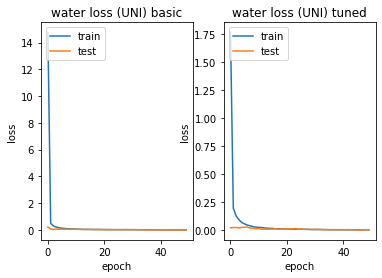

In [31]:
### to plot the loss functions 
plt.subplot(1, 2, 1)
plt.plot(history_tcn_water_basic_uni_whole.history['loss'])
plt.plot(history_tcn_water_basic_uni_whole.history['val_loss'])
plt.title('water loss (UNI) basic')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history_tcn_water_uni_tuned_whole.history['loss'])
plt.plot(history_tcn_water_uni_tuned_whole.history['val_loss'])
plt.title('water loss (UNI) tuned')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

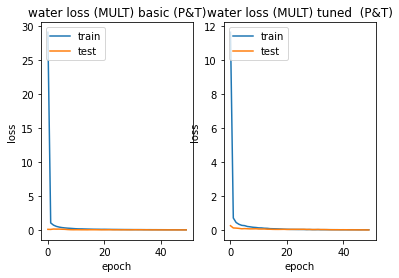

In [32]:
### to plot the loss functions 
plt.subplot(1, 2, 1)
plt.plot(history_tcn_water_mult_basic_whole.history['loss'])
plt.plot(history_tcn_water_mult_basic_whole.history['val_loss'])
plt.title('water loss (MULT) basic (P&T)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history_tcn_water_mult_tuned_whole.history['loss'])
plt.plot(history_tcn_water_mult_tuned_whole.history['val_loss'])
plt.title('water loss (MULT) tuned  (P&T)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

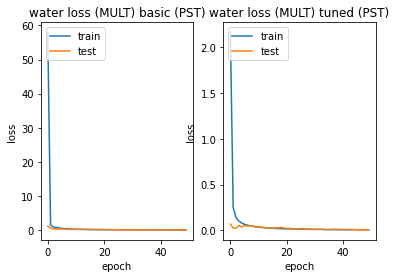

In [33]:
### to plot the loss functions 
plt.subplot(1, 2, 1)
plt.plot(history_tcn_water_mult_basic_whole_pst.history['loss'])
plt.plot(history_tcn_water_mult_basic_whole_pst.history['val_loss'])
plt.title('water loss (MULT) basic (PST)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history_tcn_water_mult_tuned_whole_pst.history['loss'])
plt.plot(history_tcn_water_mult_tuned_whole_pst.history['val_loss'])
plt.title('water loss (MULT) tuned (PST)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

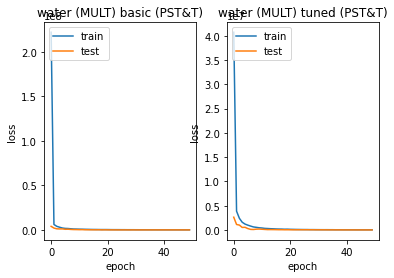

In [34]:
### to plot the loss functions 
plt.subplot(1, 2, 1)
plt.plot(history_tcn_water_mult_basic_whole_pstT.history['loss'])
plt.plot(history_tcn_water_mult_basic_whole_pstT.history['val_loss'])
plt.title('water (MULT) basic (PST&T)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history_tcn_water_mult_tuned_whole_pstT.history['loss'])
plt.plot(history_tcn_water_mult_tuned_whole_pstT.history['val_loss'])
plt.title('water (MULT) tuned (PST&T)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### visualization for test vs prediction

In [35]:
# making plotings for testing univariate models
## whole day training 
tcn_water_basic_uni_whole_Y = y_uni_test.flatten()
tcn_water_basic_uni_whole_Pred = tcn_water_basic_uni_whole.predict(x_uni_test).flatten()
df_plot_tcn_water_basic_uni_whole=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_water_basic_uni_whole_Pred, tcn_water_basic_uni_whole_Y]))))
df_plot_tcn_water_basic_uni_whole['ds']=range(0,len(tcn_water_basic_uni_whole_Y))
tcn_water_uni_tuned_whole_Y = y_uni_test.flatten()
##-----
tcn_water_uni_tuned_whole_Pred = tcn_water_uni_tuned_whole.predict(x_uni_test).flatten()
df_plot_tcn_water_uni_tuned_whole=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_water_uni_tuned_whole_Pred, tcn_water_uni_tuned_whole_Y]))))
df_plot_tcn_water_uni_tuned_whole['ds']=range(0,len(tcn_water_uni_tuned_whole_Y))
## daily training without padding 
tcn_water_basic_uni_daily_Y = y_uni_test.flatten()
tcn_water_basic_uni_daily_Pred = tcn_water_basic_uni_daily.predict(x_uni_test).flatten()
df_plot_tcn_water_basic_uni_daily=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_water_basic_uni_daily_Pred, tcn_water_basic_uni_daily_Y]))))
df_plot_tcn_water_basic_uni_daily['ds']=range(0,len(tcn_water_basic_uni_daily_Y))
tcn_water_uni_tuned_daily_Y = y_uni_test.flatten()
##------------
tcn_water_uni_tuned_daily_Pred = tcn_water_uni_tuned_daily.predict(x_uni_test).flatten()
df_plot_tcn_water_uni_tuned_daily=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_water_uni_tuned_daily_Pred, tcn_water_uni_tuned_daily_Y]))))
df_plot_tcn_water_uni_tuned_daily['ds']=range(0,len(tcn_water_uni_tuned_daily_Y))
## daily training with padding 
tcn_water_basic_uni_daily_pd_Y = y_uni_test_pd.flatten()
tcn_water_basic_uni_daily_pd_Pred = tcn_water_basic_uni_daily_pd.predict(x_uni_test_pd).flatten()
df_plot_tcn_water_basic_uni_daily_pd=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_water_basic_uni_daily_pd_Pred, tcn_water_basic_uni_daily_pd_Y]))))
df_plot_tcn_water_basic_uni_daily_pd['ds']=range(0,len(tcn_water_basic_uni_daily_pd_Y))
##-----------
tcn_water_uni_tuned_daily_pd_Y = y_uni_test_pd.flatten()
tcn_water_uni_tuned_daily_pd_Pred = tcn_water_uni_tuned_daily_pd.predict(x_uni_test_pd).flatten()
df_plot_tcn_water_uni_tuned_daily_pd=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_water_uni_tuned_daily_pd_Pred, tcn_water_uni_tuned_daily_pd_Y]))))
df_plot_tcn_water_uni_tuned_daily_pd['ds']=range(0,len(tcn_water_uni_tuned_daily_Y))

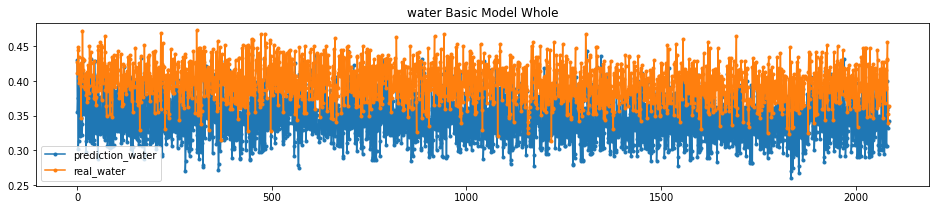

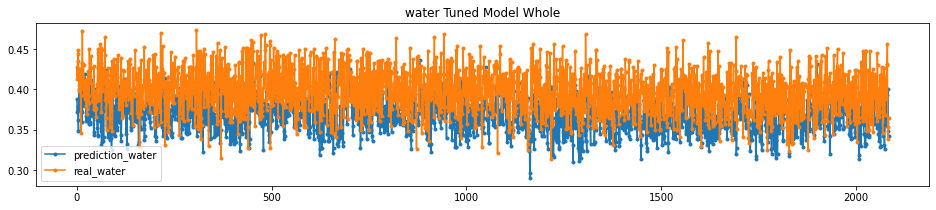

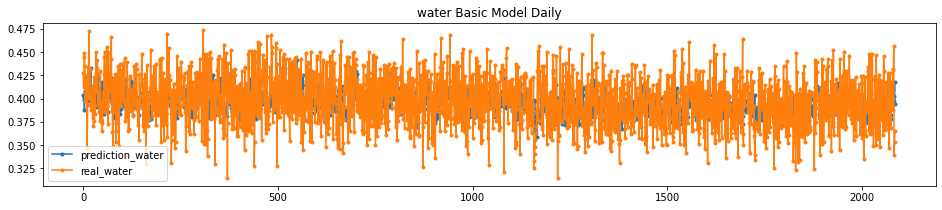

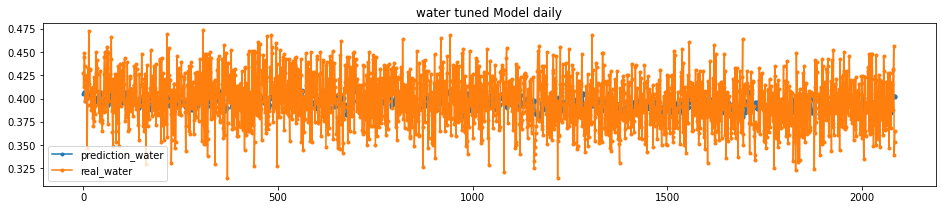

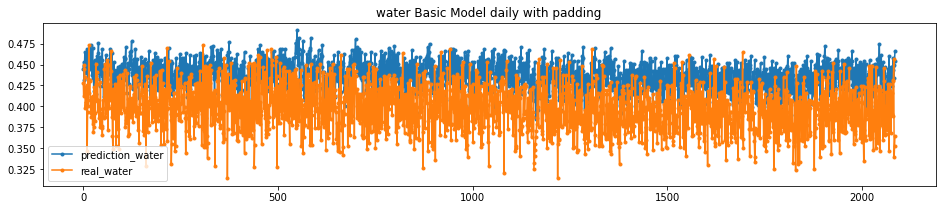

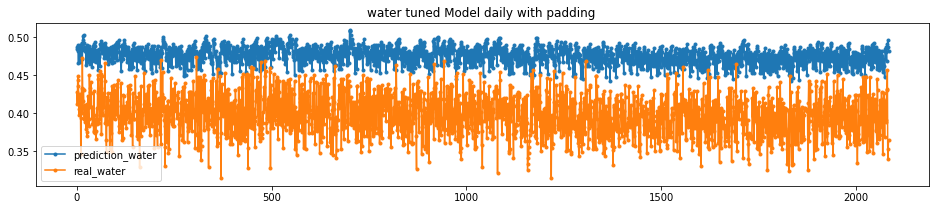

In [36]:
start = 0
end = len(df_plot_tcn_water_uni_tuned_whole)
# whole basic 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water Basic Model Whole')
ax.plot(df_plot_tcn_water_basic_uni_whole['ds'].iloc[start:end], df_plot_tcn_water_basic_uni_whole['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_water_basic_uni_whole['ds'].iloc[start:end], df_plot_tcn_water_basic_uni_whole['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# whole tuned  
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water Tuned Model Whole')
ax.plot(df_plot_tcn_water_uni_tuned_whole['ds'].iloc[start:end], df_plot_tcn_water_uni_tuned_whole['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_water_uni_tuned_whole['ds'].iloc[start:end], df_plot_tcn_water_uni_tuned_whole['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# daily basic without padding
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water Basic Model Daily')
ax.plot(df_plot_tcn_water_basic_uni_daily['ds'].iloc[start:end], df_plot_tcn_water_basic_uni_daily['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_water_basic_uni_daily['ds'].iloc[start:end], df_plot_tcn_water_basic_uni_daily['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# daily tuned without padding
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water tuned Model daily')
ax.plot(df_plot_tcn_water_uni_tuned_daily['ds'].iloc[start:end], df_plot_tcn_water_uni_tuned_daily['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_water_uni_tuned_daily['ds'].iloc[start:end], df_plot_tcn_water_uni_tuned_daily['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# daily basic with padding 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water Basic Model daily with padding')
ax.plot(df_plot_tcn_water_basic_uni_daily_pd['ds'].iloc[start:end], df_plot_tcn_water_basic_uni_daily_pd['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_water_basic_uni_daily_pd['ds'].iloc[start:end], df_plot_tcn_water_basic_uni_daily_pd['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# daily tuned with padding 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water tuned Model daily with padding ')
ax.plot(df_plot_tcn_water_uni_tuned_daily_pd['ds'].iloc[start:end], df_plot_tcn_water_uni_tuned_daily_pd['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_water_uni_tuned_daily_pd['ds'].iloc[start:end], df_plot_tcn_water_uni_tuned_daily_pd['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()

In [37]:
# making plotings for testing multivariate models --- PART 1 
## whole day training 
tcn_water_mult_basic_whole_Y = y_mult_test.flatten()
tcn_water_mult_basic_whole_Pred = tcn_water_mult_basic_whole.predict(x_mult_test).flatten()
df_plot_tcn_water_mult_basic_whole=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_water_mult_basic_whole_Pred, tcn_water_mult_basic_whole_Y]))))
df_plot_tcn_water_mult_basic_whole['ds']=range(0,len(tcn_water_mult_basic_whole_Y))
##---------
tcn_water_mult_tuned_whole_Y = y_mult_test.flatten()
tcn_water_mult_tuned_whole_Pred = tcn_water_mult_tuned_whole.predict(x_mult_test).flatten()
df_plot_tcn_water_mult_tuned_whole=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_water_mult_tuned_whole_Pred, tcn_water_mult_tuned_whole_Y]))))
df_plot_tcn_water_mult_tuned_whole['ds']=range(0,len(tcn_water_mult_tuned_whole_Y))
##---------
tcn_water_mult_basic_whole_pst_Y = y_mult_test_pst.flatten()
tcn_water_mult_basic_whole_pst_Pred = tcn_water_mult_basic_whole_pst.predict(x_mult_test_pst).flatten()
df_plot_tcn_water_mult_basic_whole_pst=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([tcn_water_mult_basic_whole_pst_Pred, tcn_water_mult_basic_whole_pst_Y]))))
df_plot_tcn_water_mult_basic_whole_pst['ds']=range(0,len(tcn_water_mult_basic_whole_pst_Y))
##------------
tcn_water_mult_tuned_whole_pst_Y = y_mult_test_pst.flatten()
tcn_water_mult_tuned_whole_pst_Pred = tcn_water_mult_tuned_whole_pst.predict(x_mult_test_pst).flatten()
df_plot_tcn_water_mult_tuned_whole_pst=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_water_mult_tuned_whole_pst_Pred, tcn_water_mult_tuned_whole_pst_Y]))))
df_plot_tcn_water_mult_tuned_whole_pst['ds']=range(0,len(tcn_water_mult_tuned_whole_pst_Y))
##------------ 
tcn_water_mult_basic_whole_pstT_Y = y_mult_test_pstT.flatten()
tcn_water_mult_basic_whole_pstT_Pred = tcn_water_mult_basic_whole_pstT.predict(x_mult_test_pstT).flatten()
df_plot_tcn_water_mult_basic_whole_pstT=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_water_mult_basic_whole_pstT_Pred, tcn_water_mult_basic_whole_pstT_Y]))))
df_plot_tcn_water_mult_basic_whole_pstT['ds']=range(0,len(tcn_water_mult_basic_whole_pstT_Y))
##-----------
tcn_water_mult_tuned_whole_pstT_Y = y_mult_test_pstT.flatten()
tcn_water_mult_tuned_whole_pstT_Pred = tcn_water_mult_tuned_whole_pstT.predict(x_mult_test_pstT).flatten()
df_plot_tcn_water_mult_tuned_whole_pstT=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_water_mult_tuned_whole_pstT_Pred, tcn_water_mult_tuned_whole_pstT_Y]))))
df_plot_tcn_water_mult_tuned_whole_pstT['ds']=range(0,len(tcn_water_mult_tuned_whole_pstT_Y))

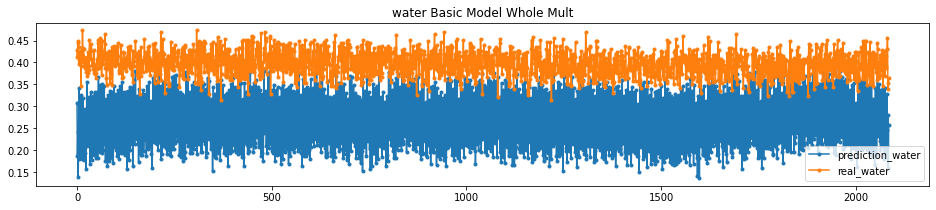

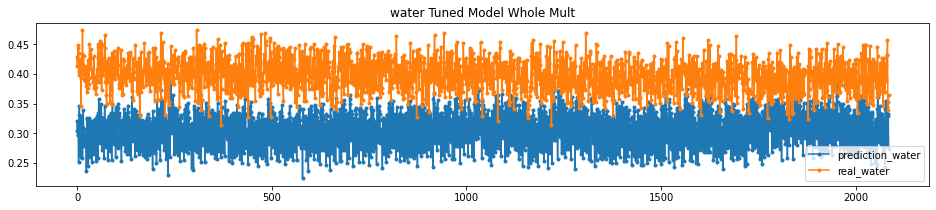

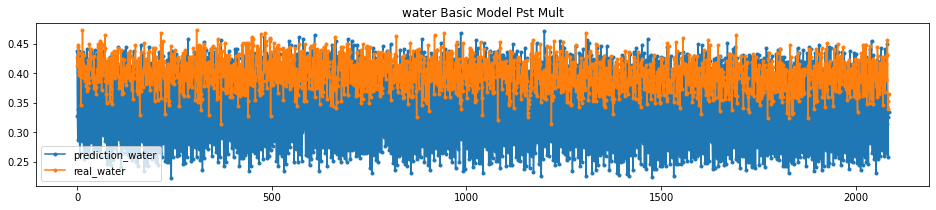

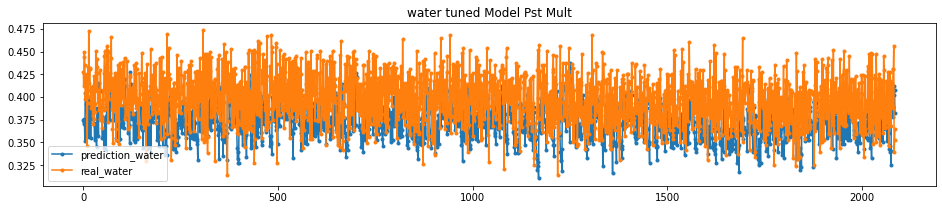

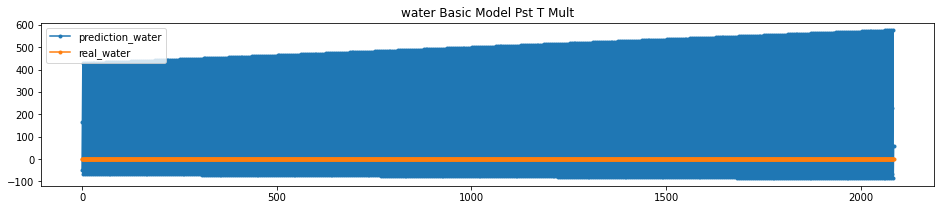

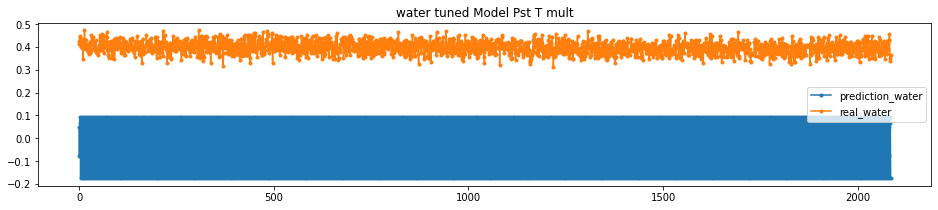

In [38]:
### whole multivariate training 
start = 0
end = len(df_plot_tcn_water_uni_tuned_whole)
# whole basic 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water Basic Model Whole Mult')
ax.plot(df_plot_tcn_water_mult_basic_whole['ds'].iloc[start:end], df_plot_tcn_water_mult_basic_whole['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_water_mult_basic_whole['ds'].iloc[start:end], df_plot_tcn_water_mult_basic_whole['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# whole tuned  
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water Tuned Model Whole Mult')
ax.plot(df_plot_tcn_water_mult_tuned_whole['ds'].iloc[start:end], df_plot_tcn_water_mult_tuned_whole['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_water_mult_tuned_whole['ds'].iloc[start:end], df_plot_tcn_water_mult_tuned_whole['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# basic with past readings
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water Basic Model Pst Mult')
ax.plot(df_plot_tcn_water_mult_basic_whole_pst['ds'].iloc[start:end], df_plot_tcn_water_mult_basic_whole_pst['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_water_mult_basic_whole_pst['ds'].iloc[start:end], df_plot_tcn_water_mult_basic_whole_pst['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# tuned with past readings 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water tuned Model Pst Mult')
ax.plot(df_plot_tcn_water_mult_tuned_whole_pst['ds'].iloc[start:end], df_plot_tcn_water_mult_tuned_whole_pst['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_water_mult_tuned_whole_pst['ds'].iloc[start:end], df_plot_tcn_water_mult_tuned_whole_pst['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# basic with past readings and time 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water Basic Model Pst T Mult')
ax.plot(df_plot_tcn_water_mult_basic_whole_pstT['ds'].iloc[start:end], df_plot_tcn_water_mult_basic_whole_pstT['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_water_mult_basic_whole_pstT['ds'].iloc[start:end], df_plot_tcn_water_mult_basic_whole_pstT['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# tuned with past readings and time 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water tuned Model Pst T mult')
ax.plot(df_plot_tcn_water_mult_tuned_whole_pstT['ds'].iloc[start:end], df_plot_tcn_water_mult_tuned_whole_pstT['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_water_mult_tuned_whole_pstT['ds'].iloc[start:end], df_plot_tcn_water_mult_tuned_whole_pstT['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()

In [39]:
# making plotings for testing multivariate models --- PART 2 
## daily training 
tcn_water_mult_basic_daily_Y = y_mult_test.flatten()
tcn_water_mult_basic_daily_Pred = tcn_water_mult_basic_daily.predict(x_mult_test).flatten()
df_plot_tcn_water_mult_basic_daily=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_water_mult_basic_daily_Pred, tcn_water_mult_basic_daily_Y]))))
df_plot_tcn_water_mult_basic_daily['ds']=range(0,len(tcn_water_mult_basic_daily_Y))
##---------
tcn_water_mult_tuned_daily_Y = y_mult_test.flatten()
tcn_water_mult_tuned_daily_Pred = tcn_water_mult_tuned_daily.predict(x_mult_test).flatten()
df_plot_tcn_water_mult_tuned_daily=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_water_mult_tuned_daily_Pred, tcn_water_mult_tuned_daily_Y]))))
df_plot_tcn_water_mult_tuned_daily['ds']=range(0,len(tcn_water_mult_tuned_daily_Y))
##---------
tcn_water_mult_basic_daily_pst_Y = y_mult_test_pst.flatten()
tcn_water_mult_basic_daily_pst_Pred = tcn_water_mult_basic_daily_pst.predict(x_mult_test_pst).flatten()
df_plot_tcn_water_mult_basic_daily_pst=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([tcn_water_mult_basic_daily_pst_Pred, tcn_water_mult_basic_daily_pst_Y]))))
df_plot_tcn_water_mult_basic_daily_pst['ds']=range(0,len(tcn_water_mult_basic_daily_pst_Y))
##------------
tcn_water_mult_tuned_daily_pst_Y = y_mult_test_pst.flatten()
tcn_water_mult_tuned_daily_pst_Pred = tcn_water_mult_tuned_daily_pst.predict(x_mult_test_pst).flatten()
df_plot_tcn_water_mult_tuned_daily_pst=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_water_mult_tuned_daily_pst_Pred, tcn_water_mult_tuned_daily_pst_Y]))))
df_plot_tcn_water_mult_tuned_daily_pst['ds']=range(0,len(tcn_water_mult_tuned_daily_pst_Y))
##------------ 
tcn_water_mult_basic_daily_pstT_Y = y_mult_test_pstT.flatten()
tcn_water_mult_basic_daily_pstT_Pred = tcn_water_mult_basic_daily_pstT.predict(x_mult_test_pstT).flatten()
df_plot_tcn_water_mult_basic_daily_pstT=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_water_mult_basic_daily_pstT_Pred, tcn_water_mult_basic_daily_pstT_Y]))))
df_plot_tcn_water_mult_basic_daily_pstT['ds']=range(0,len(tcn_water_mult_basic_daily_pstT_Y))
##-----------
tcn_water_mult_tuned_daily_pstT_Y = y_mult_test_pstT.flatten()
tcn_water_mult_tuned_daily_pstT_Pred = tcn_water_mult_tuned_daily_pstT.predict(x_mult_test_pstT).flatten()
df_plot_tcn_water_mult_tuned_daily_pstT=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_water_mult_tuned_daily_pstT_Pred, tcn_water_mult_tuned_daily_pstT_Y]))))
df_plot_tcn_water_mult_tuned_daily_pstT['ds']=range(0,len(tcn_water_mult_tuned_daily_pstT_Y))

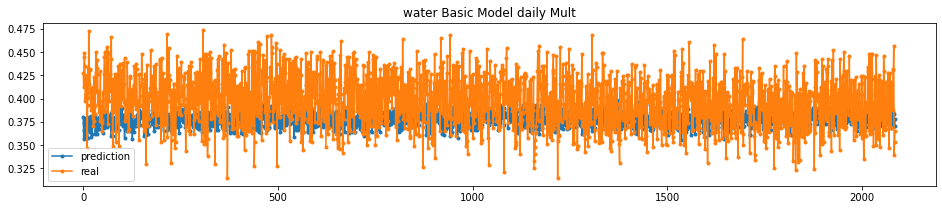

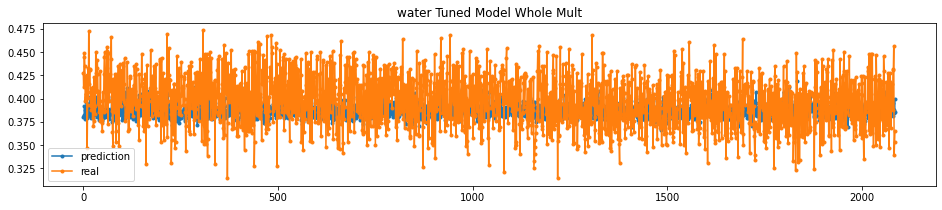

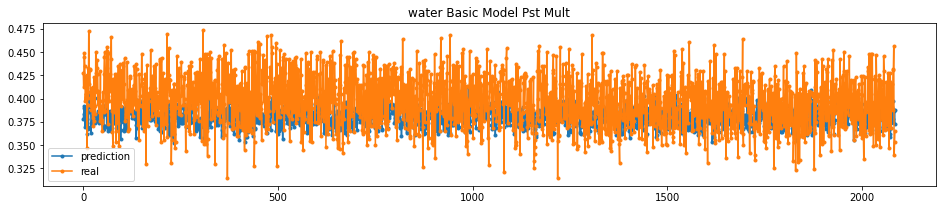

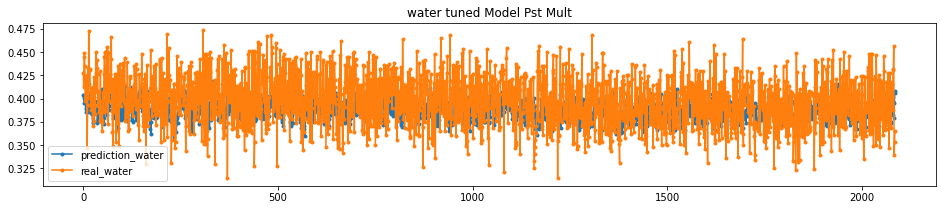

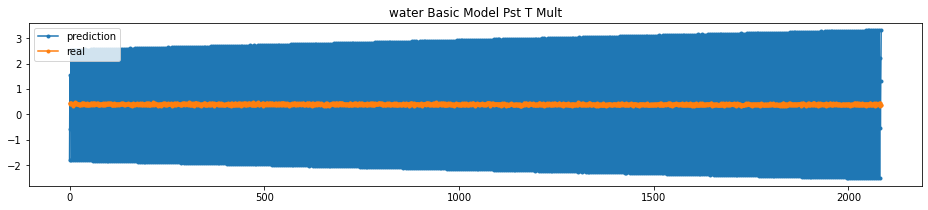

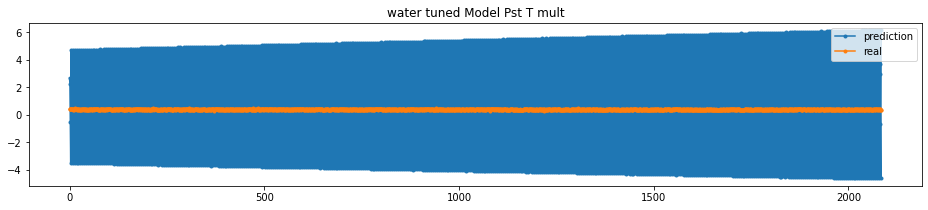

In [40]:
### daily without padding multivariate training 
start = 0
end = len(df_plot_tcn_water_uni_tuned_whole)
# daily basic 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water Basic Model daily Mult')
ax.plot(df_plot_tcn_water_mult_basic_daily['ds'].iloc[start:end], df_plot_tcn_water_mult_basic_daily['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_water_mult_basic_daily['ds'].iloc[start:end], df_plot_tcn_water_mult_basic_daily['real'].iloc[start:end], marker=".", label='real')
ax.legend()
# daily tuned  
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water Tuned Model Whole Mult')
ax.plot(df_plot_tcn_water_mult_tuned_daily['ds'].iloc[start:end], df_plot_tcn_water_mult_tuned_daily['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_water_mult_tuned_daily['ds'].iloc[start:end], df_plot_tcn_water_mult_tuned_daily['real'].iloc[start:end], marker=".", label='real')
ax.legend()
# basic with past readings
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water Basic Model Pst Mult')
ax.plot(df_plot_tcn_water_mult_basic_daily_pst['ds'].iloc[start:end], df_plot_tcn_water_mult_basic_daily_pst['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_water_mult_basic_daily_pst['ds'].iloc[start:end], df_plot_tcn_water_mult_basic_daily_pst['real'].iloc[start:end], marker=".", label='real')
ax.legend()
# tuned with past readings 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water tuned Model Pst Mult')
ax.plot(df_plot_tcn_water_mult_tuned_daily_pst['ds'].iloc[start:end], df_plot_tcn_water_mult_tuned_daily_pst['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_water_mult_tuned_daily_pst['ds'].iloc[start:end], df_plot_tcn_water_mult_tuned_daily_pst['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# basic with past readings and time 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water Basic Model Pst T Mult')
ax.plot(df_plot_tcn_water_mult_basic_daily_pstT['ds'].iloc[start:end], df_plot_tcn_water_mult_basic_daily_pstT['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_water_mult_basic_daily_pstT['ds'].iloc[start:end], df_plot_tcn_water_mult_basic_daily_pstT['real'].iloc[start:end], marker=".", label='real')
ax.legend()
# tuned with past readings and time 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water tuned Model Pst T mult')
ax.plot(df_plot_tcn_water_mult_tuned_daily_pstT['ds'].iloc[start:end], df_plot_tcn_water_mult_tuned_daily_pstT['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_water_mult_tuned_daily_pstT['ds'].iloc[start:end], df_plot_tcn_water_mult_tuned_daily_pstT['real'].iloc[start:end], marker=".", label='real')
ax.legend()

In [41]:
# making plotings for testing multivariate models --- PART 3
## daily training with padding 
tcn_water_mult_basic_daily_pd_Y = y_mult_test_pd.flatten()
tcn_water_mult_basic_daily_pd_Pred = tcn_water_mult_basic_daily_pd.predict(x_mult_test_pd).flatten()
df_plot_tcn_water_mult_basic_daily_pd=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_water_mult_basic_daily_pd_Pred, tcn_water_mult_basic_daily_pd_Y]))))
df_plot_tcn_water_mult_basic_daily_pd['ds']=range(0,len(tcn_water_mult_basic_daily_pd_Y))
##---------
tcn_water_mult_tuned_daily_pd_Y = y_mult_test_pd.flatten()
tcn_water_mult_tuned_daily_pd_Pred = tcn_water_mult_tuned_daily_pd.predict(x_mult_test_pd).flatten()
df_plot_tcn_water_mult_tuned_daily_pd=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_water_mult_tuned_daily_pd_Pred, tcn_water_mult_tuned_daily_pd_Y]))))
df_plot_tcn_water_mult_tuned_daily_pd['ds']=range(0,len(tcn_water_mult_tuned_daily_pd_Y))
##---------
tcn_water_mult_basic_daily_pd_pst_Y = y_mult_test_pst_pd.flatten()
tcn_water_mult_basic_daily_pd_pst_Pred = tcn_water_mult_basic_daily_pd_pst.predict(x_mult_test_pst_pd).flatten()
df_plot_tcn_water_mult_basic_daily_pd_pst=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([tcn_water_mult_basic_daily_pd_pst_Pred, tcn_water_mult_basic_daily_pd_pst_Y]))))
df_plot_tcn_water_mult_basic_daily_pd_pst['ds']=range(0,len(tcn_water_mult_basic_daily_pd_pst_Y))
##------------
tcn_water_mult_tuned_daily_pd_pst_Y = y_mult_test_pst_pd.flatten()
tcn_water_mult_tuned_daily_pd_pst_Pred = tcn_water_mult_tuned_daily_pd_pst.predict(x_mult_test_pst_pd).flatten()
df_plot_tcn_water_mult_tuned_daily_pd_pst=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_water_mult_tuned_daily_pd_pst_Pred, tcn_water_mult_tuned_daily_pd_pst_Y]))))
df_plot_tcn_water_mult_tuned_daily_pd_pst['ds']=range(0,len(tcn_water_mult_tuned_daily_pd_pst_Y))
##------------ 
tcn_water_mult_basic_daily_pd_pstT_Y = y_mult_test_pstT_pd.flatten()
tcn_water_mult_basic_daily_pd_pstT_Pred = tcn_water_mult_basic_daily_pd_pstT.predict(x_mult_test_pstT_pd).flatten()
df_plot_tcn_water_mult_basic_daily_pd_pstT=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_water_mult_basic_daily_pd_pstT_Pred, tcn_water_mult_basic_daily_pd_pstT_Y]))))
df_plot_tcn_water_mult_basic_daily_pd_pstT['ds']=range(0,len(tcn_water_mult_basic_daily_pd_pstT_Y))
##-----------
tcn_water_mult_tuned_daily_pd_pstT_Y = y_mult_test_pstT_pd.flatten()
tcn_water_mult_tuned_daily_pd_pstT_Pred = tcn_water_mult_tuned_daily_pd_pstT.predict(x_mult_test_pstT_pd).flatten()
df_plot_tcn_water_mult_tuned_daily_pd_pstT=pd.DataFrame.from_dict(dict(zip(['prediction', 'real' ], np.array([ tcn_water_mult_tuned_daily_pd_pstT_Pred, tcn_water_mult_tuned_daily_pd_pstT_Y]))))
df_plot_tcn_water_mult_tuned_daily_pd_pstT['ds']=range(0,len(tcn_water_mult_tuned_daily_pd_pstT_Y))

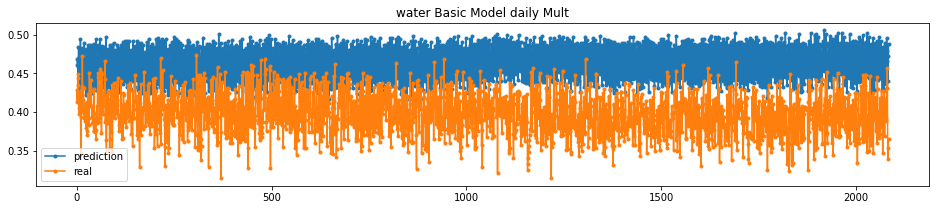

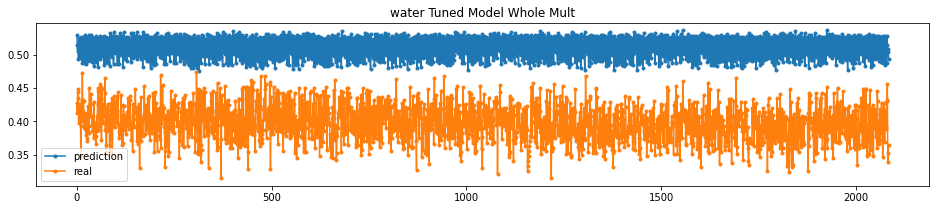

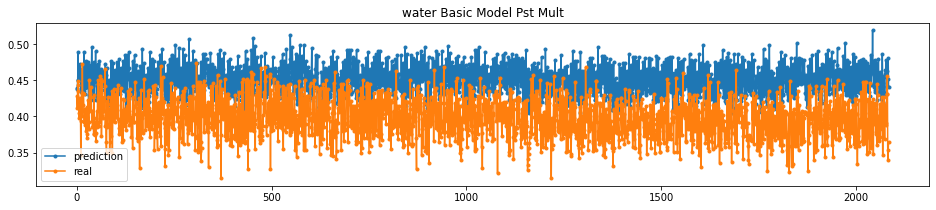

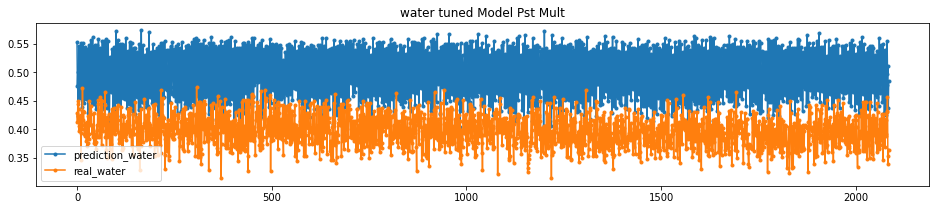

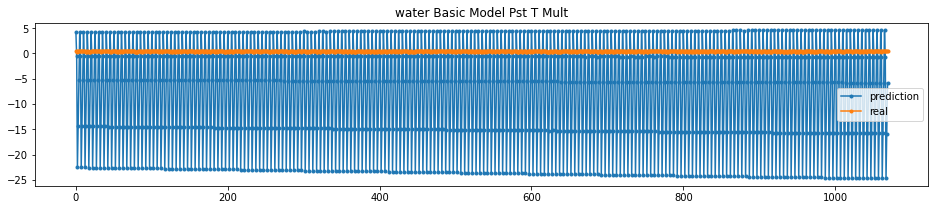

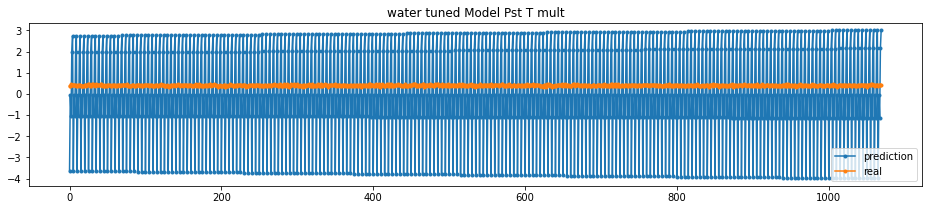

In [42]:
### daily with padding multivariate training 
start = 0
end = len(df_plot_tcn_water_uni_tuned_whole)
# daily basic 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water Basic Model daily Mult')
ax.plot(df_plot_tcn_water_mult_basic_daily_pd['ds'].iloc[start:end], df_plot_tcn_water_mult_basic_daily_pd['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_water_mult_basic_daily_pd['ds'].iloc[start:end], df_plot_tcn_water_mult_basic_daily_pd['real'].iloc[start:end], marker=".", label='real')
ax.legend()
# daily tuned  
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water Tuned Model Whole Mult')
ax.plot(df_plot_tcn_water_mult_tuned_daily_pd['ds'].iloc[start:end], df_plot_tcn_water_mult_tuned_daily_pd['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_water_mult_tuned_daily_pd['ds'].iloc[start:end], df_plot_tcn_water_mult_tuned_daily_pd['real'].iloc[start:end], marker=".", label='real')
ax.legend()
# basic with past readings
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water Basic Model Pst Mult')
ax.plot(df_plot_tcn_water_mult_basic_daily_pd_pst['ds'].iloc[start:end], df_plot_tcn_water_mult_basic_daily_pd_pst['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_water_mult_basic_daily_pd_pst['ds'].iloc[start:end], df_plot_tcn_water_mult_basic_daily_pd_pst['real'].iloc[start:end], marker=".", label='real')
ax.legend()
# tuned with past readings 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water tuned Model Pst Mult')
ax.plot(df_plot_tcn_water_mult_tuned_daily_pd_pst['ds'].iloc[start:end], df_plot_tcn_water_mult_tuned_daily_pd_pst['prediction'].iloc[start:end], marker=".", label='prediction_water')
ax.plot(df_plot_tcn_water_mult_tuned_daily_pd_pst['ds'].iloc[start:end], df_plot_tcn_water_mult_tuned_daily_pd_pst['real'].iloc[start:end], marker=".", label='real_water')
ax.legend()
# basic with past readings and time 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water Basic Model Pst T Mult')
ax.plot(df_plot_tcn_water_mult_basic_daily_pd_pstT['ds'].iloc[start:end], df_plot_tcn_water_mult_basic_daily_pd_pstT['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_water_mult_basic_daily_pd_pstT['ds'].iloc[start:end], df_plot_tcn_water_mult_basic_daily_pd_pstT['real'].iloc[start:end], marker=".", label='real')
ax.legend()
# tuned with past readings and time 
fig,ax = plt.subplots(figsize=(16,3))
ax.set_title('water tuned Model Pst T mult')
ax.plot(df_plot_tcn_water_mult_tuned_daily_pd_pstT['ds'].iloc[start:end], df_plot_tcn_water_mult_tuned_daily_pd_pstT['prediction'].iloc[start:end], marker=".", label='prediction')
ax.plot(df_plot_tcn_water_mult_tuned_daily_pd_pstT['ds'].iloc[start:end], df_plot_tcn_water_mult_tuned_daily_pd_pstT['real'].iloc[start:end], marker=".", label='real')
ax.legend()